# PortfolioState TypedDict

This code defines a **structured dictionary** to represent the **state of a financial portfolio** in Python. Using `TypedDict` ensures that the dictionary has **specific keys with defined types**, which helps prevent errors and makes the code easier to understand and maintain.

## Purpose of the Code
- To create a **type-safe way** to store portfolio data.
- To enforce **what kind of values** each key can hold:
  - `amount_usd` → Amount of money in USD.
  - `total_usd` → Total value in USD.
  - `target_currency` → The currency you want to convert your portfolio into (`'inr'` or `'eur'` only).
  - `total` → Total portfolio value in the target currency.

## Why This is Useful
- Provides **clarity** about the structure of portfolio data.
- Helps **catch errors early** if someone assigns the wrong type or invalid currency.
- Makes the code **easier to read, maintain, and extend** for future calculations or features.


In [31]:
from typing import TypedDict ,Literal
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal['inr', 'eur']
    total: float
    


# PortfolioState Functions

These functions operate on a `PortfolioState` dictionary to **calculate total values** and **convert currencies** based on the target currency.

### 1. `calc_total(state: PortfolioState) -> PortfolioState`
- Calculates `total_usd` by applying an **8% increase** on `amount_usd`.  
- Returns the updated `state` dictionary.  
- Example: If `amount_usd = 1000`, `total_usd = 1080`.

### 2. `convert_to_inr(state: PortfolioState) -> PortfolioState`
- Converts `total_usd` to **Indian Rupees (INR)** using a conversion rate of `82.0`.  
- Updates the `total` field in the dictionary.  
- Example: `total_usd = 1080` → `total = 88560`.

### 3. `convert_to_eur(state: PortfolioState) -> PortfolioState`
- Converts `total_usd` to **Euros (EUR)** using a conversion rate of `0.93`.  
- Updates the `total` field in the dictionary.  
- Example: `total_usd = 1080` → `total = 1004.4`.

### 4. `choose_conversion(state: PortfolioState) -> str`
- Decides which conversion function to use based on `target_currency`.  
- Returns:
  - `'convert_to_inr'` if `target_currency` is `'inr'`
  - `'convert_to_eur'` if `target_currency` is `'eur'`  
- Raises a `ValueError` if the currency is unsupported.

---

### **Purpose of These Functions**
- Automates **calculations and currency conversions** for a portfolio.  
- Ensures **type-safe operations** on the `PortfolioState` dictionary.  
- Makes it easy to **expand or modify conversion rates** in the future.


In [32]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 82.0
    return state
def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 0.93
    return state
def choose_conversion(state: PortfolioState) -> str:
    if state['target_currency'] == 'inr':
        return 'convert_to_inr'
    elif state['target_currency'] == 'eur':
        return 'convert_to_eur'
    else:
        raise ValueError(f"Unsupported currency: {state['target_currency']}")


# PortfolioState Workflow with LangGraph

This code defines a **state graph workflow** using `LangGraph` to automate portfolio calculations and currency conversions. 

## What It Does
- Calculates the total value in USD from an initial `amount_usd`.
- Converts the total to the **target currency** (INR or EUR) dynamically based on user choice.
- Executes a clear workflow from **START → calculation → conversion → END**.

## Characteristics
- **Type-Safe**: Operates on the `PortfolioState` TypedDict, ensuring all dictionary keys and types are correct.
- **Modular**: Each step (`calc_total`, `convert_to_inr`, `convert_to_eur`) is a separate function (node) in the graph.
- **Dynamic**: Uses `choose_conversion` to decide the next step based on the target currency.
- **Structured Workflow**: Clearly defines the execution order with conditional edges and start/end nodes.
- **Extensible**: Easy to add more currencies or additional calculations in the future.

This workflow makes financial portfolio operations **automated, readable, and maintainable**.



In [33]:
from langgraph.graph import StateGraph ,START, END
builder = StateGraph(PortfolioState)
builder.add_node('calc_total', calc_total)
builder.add_node('convert_to_inr', convert_to_inr)
builder.add_node('convert_to_eur', convert_to_eur)
builder.add_edge(START, 'calc_total')
builder.add_conditional_edges('calc_total', choose_conversion, {
    'convert_to_inr': 'convert_to_inr',
    'convert_to_eur': 'convert_to_eur'
})
builder.add_edge(['convert_to_inr', 'convert_to_eur'], END)
graph = builder.compile()

In [34]:
from IPython.display import display, Markdown


mermaid_src = graph.get_graph().draw_mermaid()

display(Markdown(f"```mermaid\n{mermaid_src}\n```"))


```mermaid
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	calc_total(calc_total)
	convert_to_inr(convert_to_inr)
	convert_to_eur(convert_to_eur)
	__end__([<p>__end__</p>]):::last
	__start__ --> calc_total;
	calc_total -.-> convert_to_eur;
	calc_total -.-> convert_to_inr;
	convert_to_eur --> __end__;
	convert_to_inr --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

```

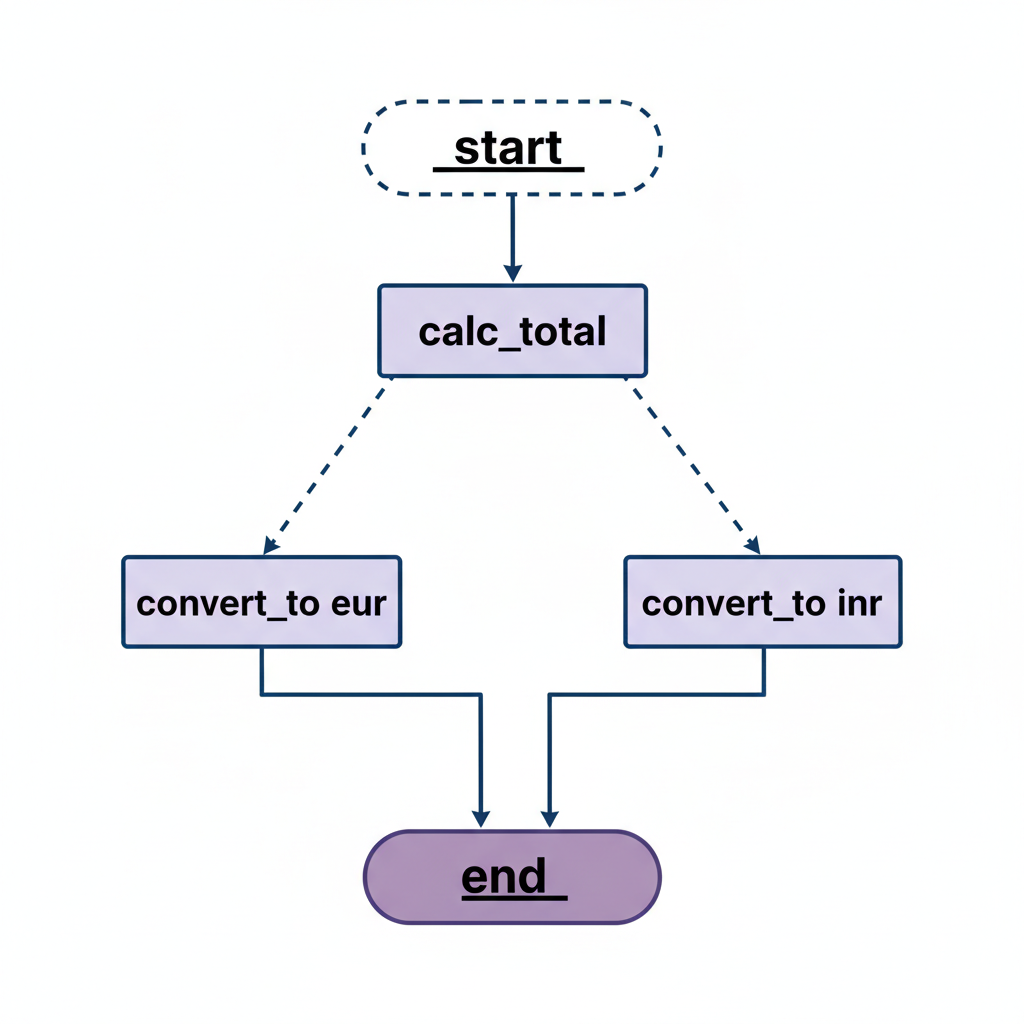

In [35]:
graph.invoke({'amount_usd': 100.0, 'target_currency': 'eur'})

{'amount_usd': 100.0,
 'total_usd': 108.0,
 'target_currency': 'eur',
 'total': 100.44000000000001}

In [36]:
graph.invoke({'amount_usd': 100.0, 'target_currency': 'inr'})

{'amount_usd': 100.0,
 'total_usd': 108.0,
 'target_currency': 'inr',
 'total': 8856.0}